# Preparation

In [131]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams.update({'font.size': 22})

t = 15*np.pi/180
R = np.array([[np.cos(t), np.sin(t)], [-np.sin(t), np.cos(t)]])

def loss1(x, y):
  pR = R @ [x, y]
  Z = pR[0]**2 + 9*(pR[1])**2
  return Z

def loss1_grad(x, y):
  pR = R @ [x, y]
  dpR_dxy = R
  dZ_dxy = 2.0*pR[0]*dpR_dxy[0,:] + 18.0*pR[1]*dpR_dxy[1,:]
  return dZ_dxy

def loss2(x, y):
  pR = R @ [x, y]
  Z = 0.05*(-4*(pR[0]**2) + (pR[0]**3) + (pR[0]**4) + 150*(pR[1])**2)
  return Z

def loss2_grad(x, y):
  pR = R @ [x, y]
  dpR_dxy = R
  dZ_dxy = 0.05*((-8*pR[0] + 3*(pR[0]**2) + 4*(pR[0]**3))*dpR_dxy[0,:] + 300.0*pR[1]*dpR_dxy[1,:])
  return dZ_dxy

def L_on_grid(L_func, xmin, xmax, ymin, ymax):
  grid_x, grid_y = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))
  grid_L = L_func(grid_x.ravel(), grid_y.ravel()).reshape(grid_x.shape)
  return grid_x, grid_y, grid_L

def plot_loss_and_steps(L_func, positions=[]):
  fig, ax = plt.subplots(figsize=(10,10))
  x, y, Lgrid = L_on_grid(L_func, -3, 3, -3, 3)
  min_val = np.min(Lgrid)
  ax.contour(x, y, Lgrid, levels=np.linspace(min_val+0.02, min_val+15, 45))
  if len(positions) > 0:
    ax.plot(positions[:,0], positions[:,1], '-', color='blue')
    ax.scatter(positions[:,0], positions[:,1], color='red', s=5)
  fig.show()

def do_grad_desc(p0, L_grad_func, eta, n_steps):
  """do simple gradient descent
  Parameters
  ----------
  p0: initial value, 2 element list or numpy vector of float or int
  L_grad_func: python function that computes gradient of loss
  eta: learning rate
  n_steps: number of steps to take

  Returns
  -------
  positions: numpy array with positions, shape=(n_steps, 2)
  """
  values = [p0]
  p = np.array(p0, dtype=np.float64)
  for i in range(n_steps):
    p -= eta * L_grad_func(p[0], p[1])
    values.append(list(p))

  return np.asarray(values)

figsize=(12,7)

def plot_2d_data_and_prediction(model, features, target):
  """scatterplot data and plot prediction on regular grid
  Parameters
  ----------
  model: sklearn model object
  features: n_samples x 2 features array
  target: n_samples long integer array, all values 0 or 1
  """

  fig, ax = plt.subplots(figsize=figsize)

  # find where target is 0 or 1
  target_is_0 = np.where(target == 0)
  target_is_1 = np.where(target == 1)

  # scatterplot the two subsets
  ax.scatter(features[target_is_0, 0], features[target_is_0, 1], label='0', color='blue')
  ax.scatter(features[target_is_1, 0], features[target_is_1, 1], label='1', color='red')

  # make a grid to predict on
  xrange = ax.get_xlim()
  yrange = ax.get_ylim()
  xgrid, ygrid = np.meshgrid(np.linspace(xrange[0], xrange[1], 100), np.linspace(yrange[0], yrange[1], 100))
  # transform grid positions into n_grid_pts x 2 array for prediction
  pos = np.stack([xgrid.ravel(), ygrid.ravel()]).T
  # do predictions
  pred_classes = model.predict(pos).reshape(xgrid.shape)
  # plot (more convenient syntax than imshow)
  ax.pcolor(xgrid, ygrid, pred_classes, zorder=0, cmap='coolwarm', edgecolors=None, alpha=0.25)

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend()
  fig.show()

# Part 1: gradient descent

## 1

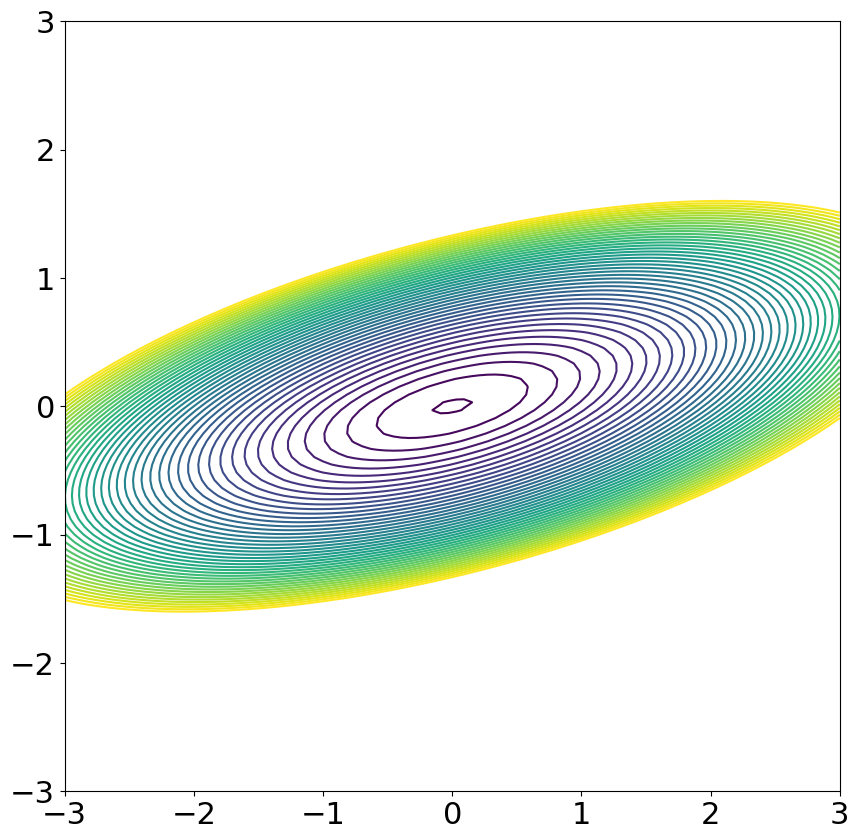

In [132]:
 plot_loss_and_steps(loss1)


### There is only one central point surrounded by concentric contours, which means there is only one minimum. The coordinates of the minimum of the loss1 function is approximately (0,0).

## 2

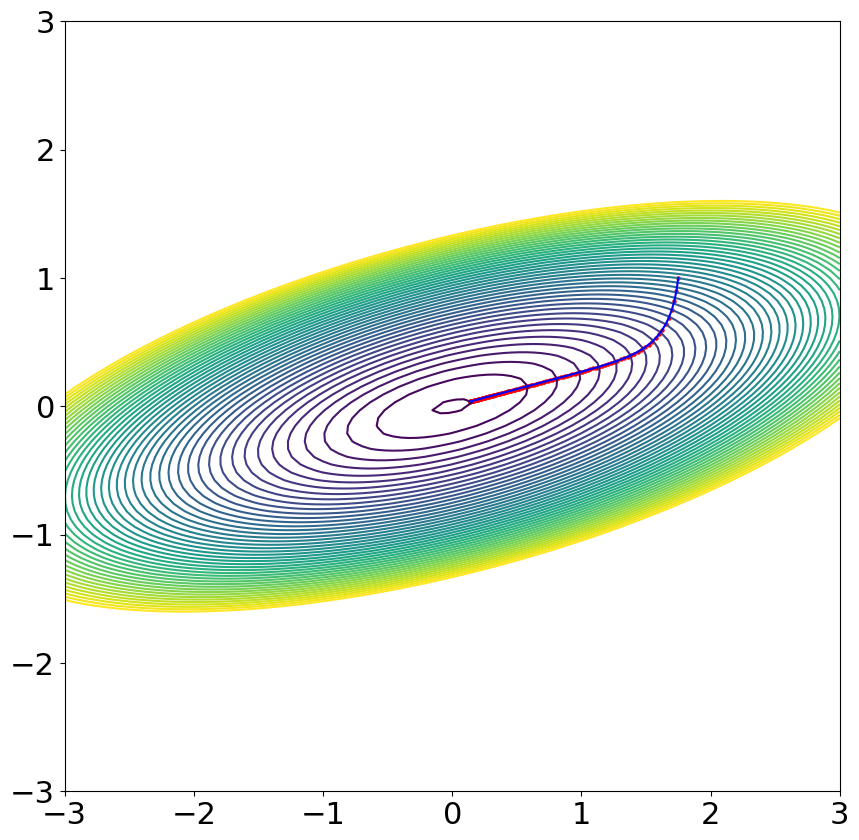

In [133]:
positions = do_grad_desc([1.75, 1.0], loss1_grad, 0.01, 130)
plot_loss_and_steps(loss1, positions)


### The minimum number (steps) sufficient for reaching the innermost contour to within about 5-10% is 130.

## 3

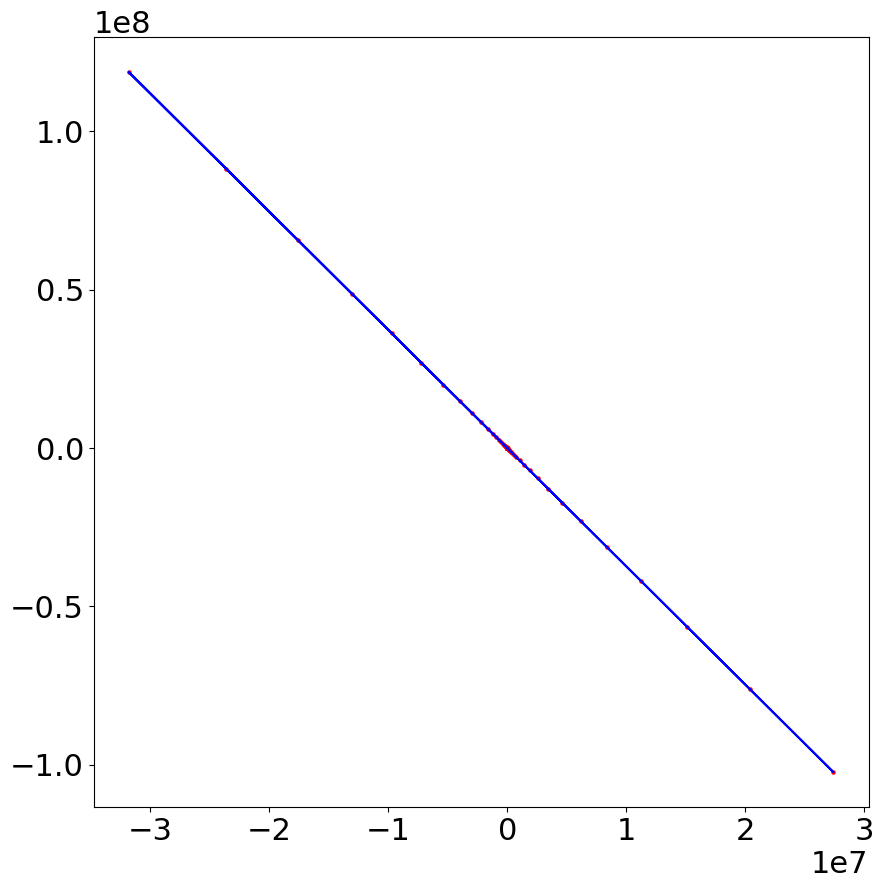

In [134]:
positions = do_grad_desc([1.75, 1.0], loss1_grad, 0.12, 130)
plot_loss_and_steps(loss1, positions)

### converging stops at learning rate=0.12 when the steps are set to 130.

## 4

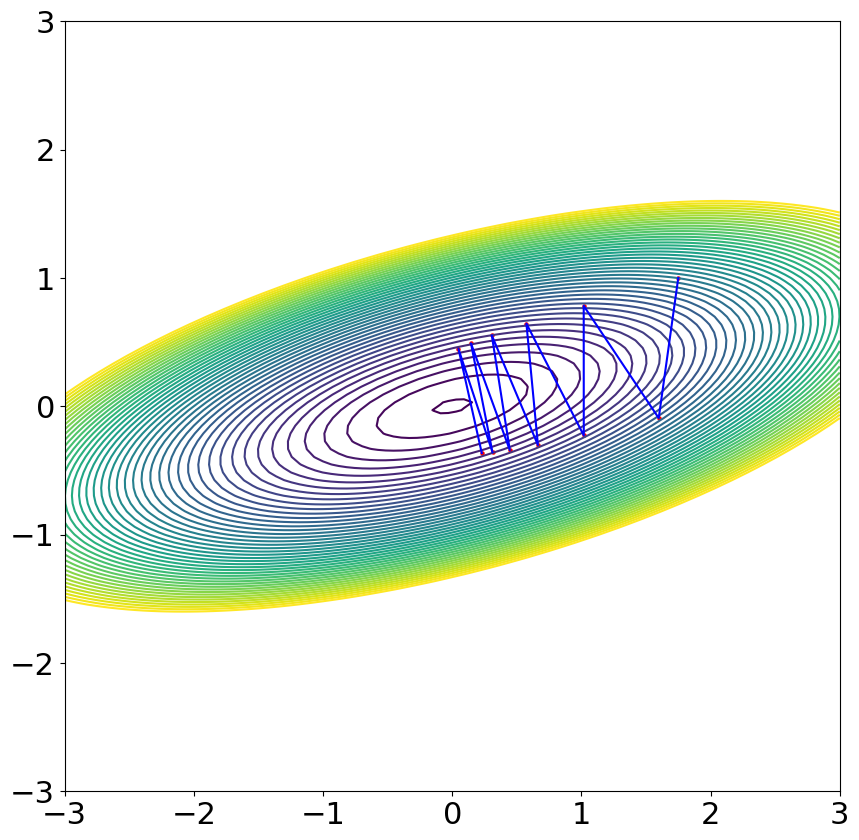

In [135]:
positions = do_grad_desc([1.75, 1.0], loss1_grad, 0.11, 11)
plot_loss_and_steps(loss1, positions)

### The number of steps that makes it barely reach the innermost contour is 11.

## 5

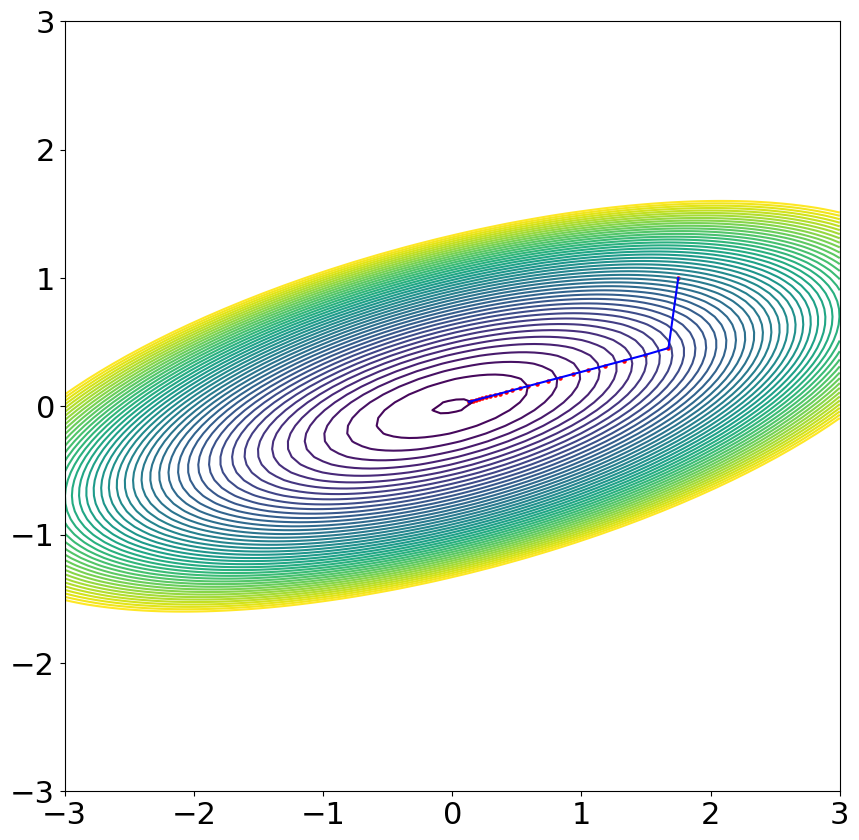

In [136]:
positions = do_grad_desc([1.75, 1.0], loss1_grad, 0.055, 23)
plot_loss_and_steps(loss1, positions)

### The number of steps that makes it barely reach the innermost contour is 23.

## 6

| Trial | Eta   | Number of Steps | Convergence     |
|-------|-------|-----------------|-----------------|
| 1     | 0.01  | 130             | Reached         |
| 2     | 0.12  | 130             | Stops converging|
| 3     | 0.11  | 11              | Reached         |
| 4     | 0.055 | 23              | Reached         |


### For trial 1, with a small learning rate, the steps taken are too small, leading to slower convergence (more steps). While convergence is guaranteed with a small enough learning rate, it might not be efficient in terms of the number of steps required.
### Trial 2 suggets that a significantly larger learning rate resulted in overshooting the minimum, causing the algorithm to diverge.
### Trial 3 proves that a larger learning rate allowed for faster convergence by taking larger steps towards the minimum.
### In trial 4, a half smaller learning rate compared to Trial 3 allowed for relatively faster convergence.
### In conclusion, the eta and steps taken are reversly proportional to each other. Having a significantly small learning rate may result in slow convergence (more steps), while choosing one that is too large may lead to instability or divergence.

## 7

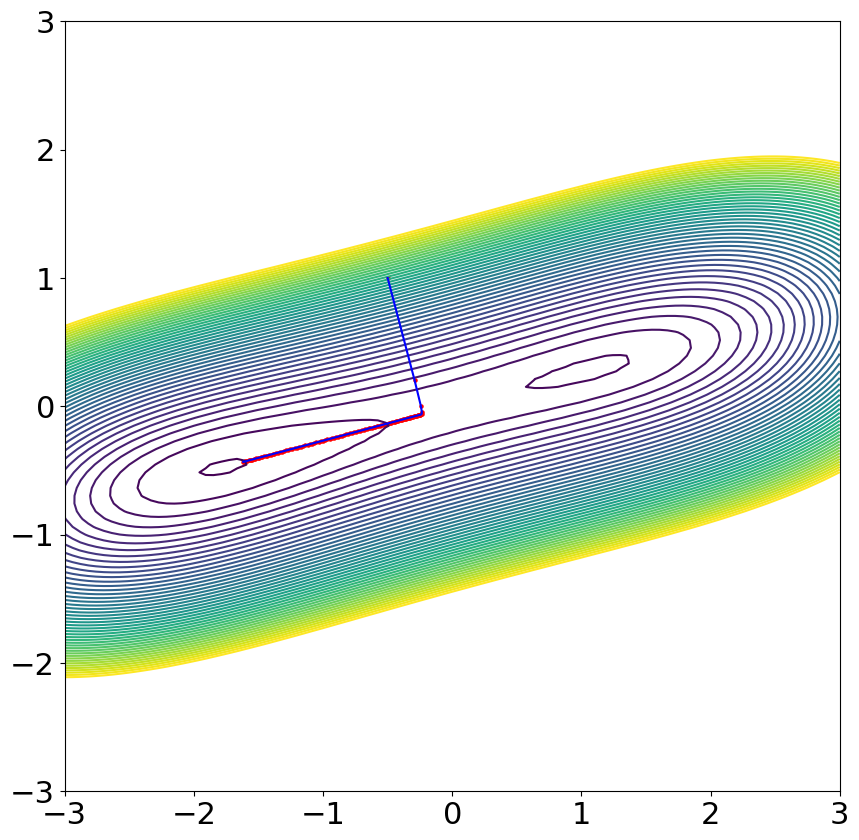

In [137]:
positions_2 = do_grad_desc([-0.5, 1.0], loss2_grad, 0.05, 120)
plot_loss_and_steps(loss2, positions_2)

### Minimum 1 (-2, -0.5)
### Minimum 2 (1,0)
### it took 120 steps to reach minimum 1.

## 8

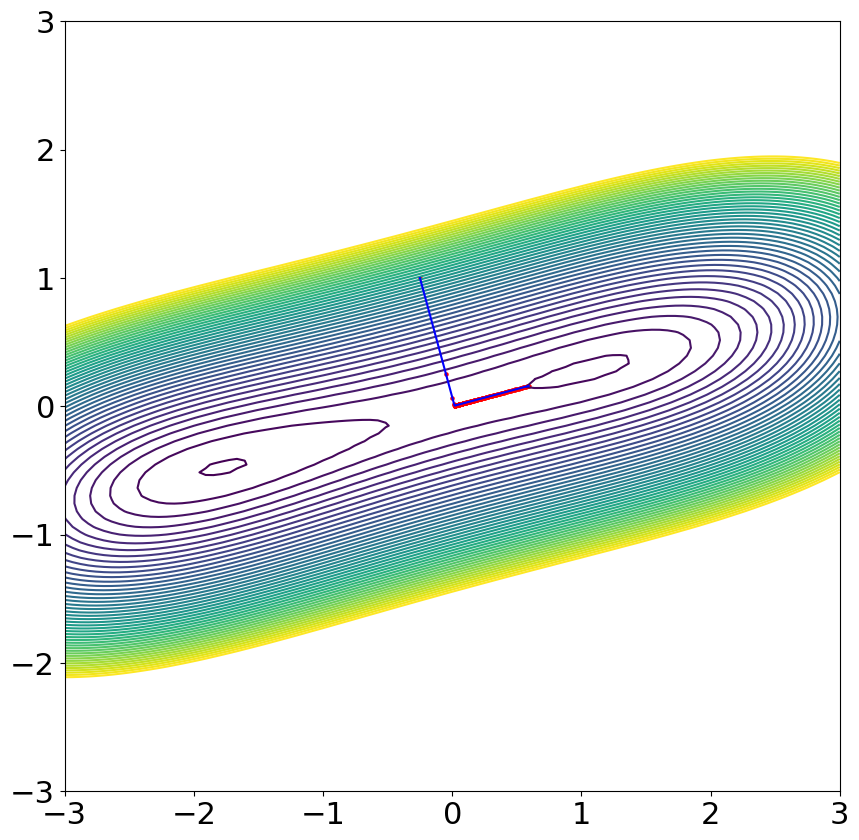

In [138]:
positions_2 = do_grad_desc([-0.25, 1.0], loss2_grad, 0.05, 200)
plot_loss_and_steps(loss2, positions_2)

### The number of steps that makes it reach the innermost contour (of minimum 2) is 200.

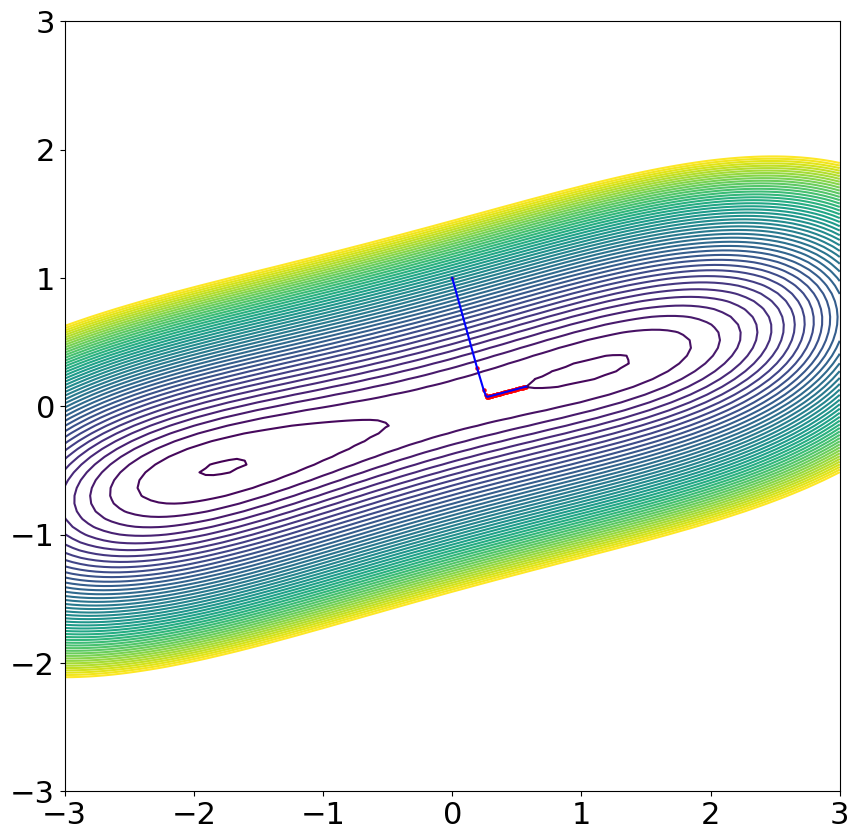

In [139]:
positions_2 = do_grad_desc([0.0, 1.0], loss2_grad, 0.05, 55)
plot_loss_and_steps(loss2, positions_2)

### The number of steps that makes it reach the innermost contour (of minimum 2) is 55.

## 9

###  The change of initial position also changes the trajectories in the parameter space. As the trajectory represents how the algorithm moves through the parameter space towards the optimal solution, it starts from an initial point and gradually moves the direction of steepest descent until it reaches a local minimum. Therefore, it would be difficult to find the global (deepest) minimum because we need to test a wide range of trajectories.


# Part 2

## 1

In [140]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn.datasets

d = sklearn.datasets.load_iris()
print(d.keys())

print(d['DESCR'])
print(d['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

## 2

In [141]:
dataset = pd.DataFrame(d['data'])
dataset.columns = d['feature_names']

print(dataset.columns)
print(dataset.head())
print(len(dataset))

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
150


In [142]:
np.random.seed(5)

from sklearn.model_selection import train_test_split

data_fit, data_test, target_fit, target_test = train_test_split(dataset, d['target'], test_size=1/3)

print("Fitting data shape:", data_fit.shape)
print("Testing data shape:", data_test.shape)
print("Fitting target shape:", target_fit.shape)
print("Testing target shape:", target_test.shape)

Fitting data shape: (100, 4)
Testing data shape: (50, 4)
Fitting target shape: (100,)
Testing target shape: (50,)


## 3

In [143]:
featured_fit = data_fit[['sepal length (cm)','petal length (cm)']].values
featured_test = data_test[['sepal length (cm)','petal length (cm)']].values


## 4

In [144]:
print(d['target_names'])
print(d['target'])
# versicolor is represented by "1"

fit_target_array = (target_fit == 1).astype(int)
test_target_array = (target_test == 1).astype(int)
# returns 'False's into 0s and 'True's into 1s.

print(fit_target_array)
print(test_target_array)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1]
[1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0]


## 5

In [145]:
from sklearn.linear_model import LogisticRegression

model_lin = LogisticRegression(max_iter=1000)

model_lin.fit(featured_fit, fit_target_array)

LogisticRegression(max_iter=1000)

## 6

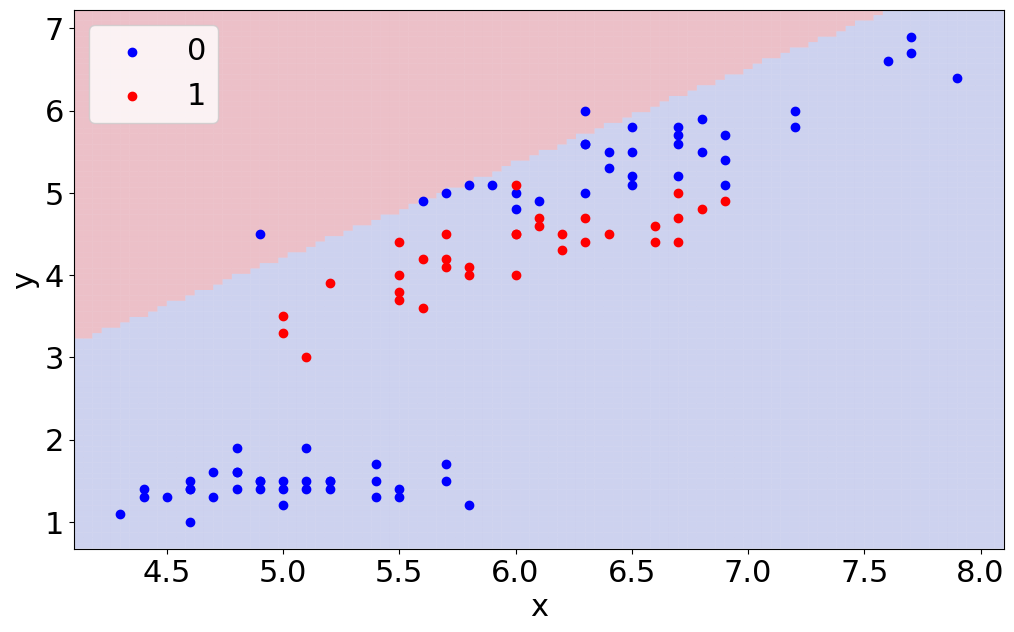

In [146]:
plot_2d_data_and_prediction(model_lin, featured_fit, fit_target_array)

### The classification is bad because the boundary does not separate blue dots from red dots.

## 7

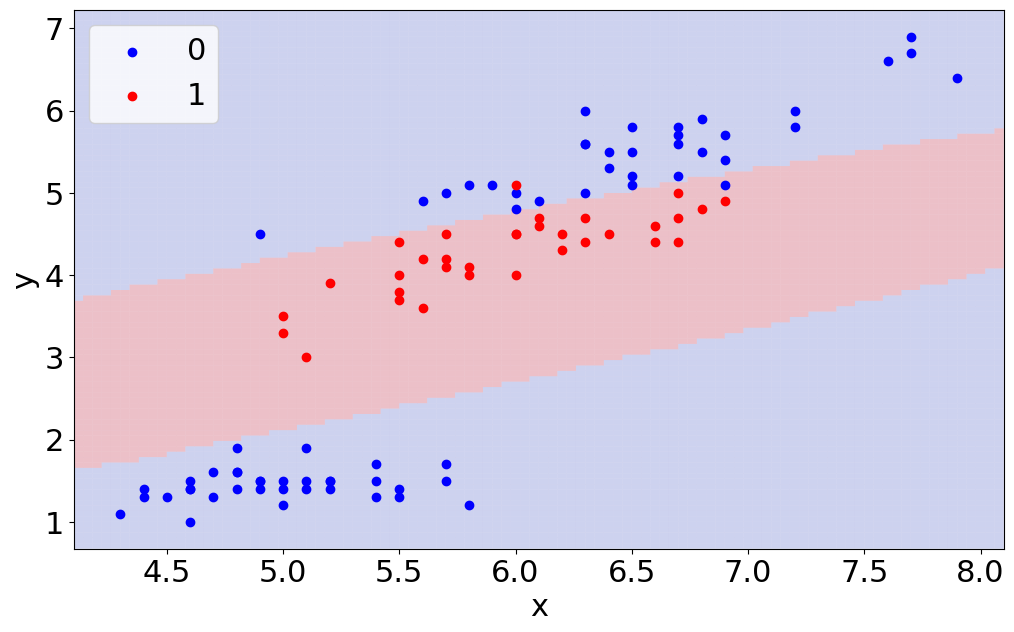

In [147]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)
model_pipeline = make_pipeline(pf, LogisticRegression(max_iter=1000))
model_pipeline.fit(featured_fit, fit_target_array)

plot_2d_data_and_prediction(model_pipeline, featured_fit, fit_target_array)

### This classification is much better than last one. The boundaries separate most of the red dots from blue dots, leaving only a couple mismatch in the corresponding colored area. So this is a good classification.

## 8

In [148]:
print('logistic regression score', model_lin.score(featured_test, test_target_array) )
print('pipeline score', model_pipeline.score(featured_test, test_target_array))

logistic regression score 0.64
pipeline score 0.92


### Based on the two scores, I would expect model_lin to perform badly and model_pipeline to perform good. This expectation lies consistent with the two graphs in steps 6 and 7, respectfully. In step 6, the Logistic Regression model is relatively linear, while in step 7, the Polynomial Logistic Regression model captures more complex patterns in the data. Therefore, model_pipeline's score is close to 1, indicating the model has higher proportion of true positives and true negatives and is making correct predictions for most of the instances in the testing dataset.

## 9

In [149]:
full_fit = data_fit[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
full_test = data_test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values

full_model = LogisticRegression(max_iter=1000)

full_model.fit(full_fit, fit_target_array)
print('logistic regression for full data score', full_model.score(full_test, test_target_array) )

logistic regression for full data score 0.68


### The logistic regression model with 4 features is slightly higher than the linear 2-feature model but still significantly lower than the quadratic 2-feature model. This suggests the additional features provide some improvement in predictive performance in linear models, but it is not significant; on the other hand, including the polynomial features allows the model to capture more complex relationships between the features and the target variable, making the predictive performance better.